- Boxplot
- Variância
- Desvio Padrão
- Distribuições
- Regressão Linear
- Intervalo de Confiança

# Packages

In [87]:
import numpy as np
import statistics as st
import math
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Data Used in All Examples

In [88]:
numerical = [2,5,7,4,1,9,5,9,2,6,7,9,4,3,5,7] # Par

numerical_even = [2,5,7,4,1,9,10,9,2,6,7,9,4,3,5,7] # Par
numerical_odd = [2,5,7,4,1,9,5,9,2,6,7,9,4,3,5,7,2] # Impar

numerical_mode = [2,5,7,4,1,9,5,9,2,6,7,9,4,3,5,71,1,1,1,1,1,1,1] # Par
numerical_multimode = [1,1,1,2,2,2,3,3,3,5,4,6,32,6,78,78,6,9,65,4,5]

categorical = ['banana','laranja','maçã','abacate','laranja','melão']

count = int
total = float

# Central Tendency Measures

## Mean

$$\bar{x} = \frac{\sum_{i=1}^{n}x_{i}}{n}$$

In [89]:
# Hard Coded
count = 0
total = 0
for n in numerical:
    total += n
    count += 1

# Show Mean
print("Mean (Hard Coded): ", total/count)
print("Mean (Numpy): ", np.mean(numerical))
print("Mean (Statistics): ", st.mean(numerical))


Mean (Hard Coded):  5.3125
Mean (Numpy):  5.3125
Mean (Statistics):  5.3125


## Harmonic Mean

$$M_{h} = \frac{n}{\sum_{i=1}^{n}\frac{1}{x_{i}}}$$

In [90]:
# Hard Coded
count = 0
total = 0
for n in numerical:
    total += (1/n)
    count += 1

# Show Mean
print("Harmonic Mean (Hard Coded): ", count/total)
print("Harmonic Mean (Scipy): ", scipy.stats.hmean(numerical))
print("Harmonic Mean (Statistics): ", st.harmonic_mean(numerical))

Harmonic Mean (Hard Coded):  3.6681222707423577
Harmonic Mean (Scipy):  3.6681222707423577
Harmonic Mean (Statistics):  3.668122270742358


## Mode

The most frequently term. It can be one or more terms and can be categorical data.

In [91]:
def mode(l):

    count = {}

    for el in l:
        if el in count:
            count[el] += 1
        else:
            count[el] = 1   

    return sorted(count, key=count.get, reverse=True)[0]

In [92]:
# Hard Coded
print("Mode (Hard Coded - Categorical): ", mode(categorical))
print("Mode (Hard Coded - Numerical): ", mode(numerical_mode))

# It is not implemented in Numpy

# Statistics
print("\nMode (Statistics - Categorical): ", st.mode(categorical))
print("Mode (Statistics - Numerical): ", st.mode(numerical_mode))
print("MultiMode (Statistics - Categorical): ", st.multimode(numerical_multimode))

Mode (Hard Coded - Categorical):  laranja
Mode (Hard Coded - Numerical):  1

Mode (Statistics - Categorical):  laranja
Mode (Statistics - Numerical):  1
MultiMode (Statistics - Categorical):  [1, 2, 3, 6]


## Median

We have to select the central element. To do this:

* We need to sort the list
* Find the median term: if the number is odd, it is the central element, however, if it is even, the median is the average of the two central elements.

In [93]:
def median(l):
    
    # Sorted List
    l = sorted(l)

    # Size os list
    s = len(l)

    # Check if it is even or odd
    if s%2 == 0:
        return (l[int(s/2)-1]+l[int(s/2)])/2
    else:
        return l[math.ceil(s/2)]

In [94]:
# Hard Coded
print(sorted(numerical_even))
print(sorted(numerical_odd), median(numerical_odd))

# Numpy
print("\nMedian (Hard Coded - Even)", median(numerical_even))
print("Median (Hard Coded - Odd)", median(numerical_odd))

# Percentile
print("\nMedian (Numpy - Percentile - Even)", np.percentile(numerical_even, 50, method='midpoint'))
print("Median (Numpy - Percentile - Odd)", np.percentile(numerical_odd, 50, method='midpoint'))

# Numpy
print("\nMedian (Numpy - Even)", np.median(numerical_even))
print("Median (Numpy - Odd)", np.median(numerical_odd))

# Statistics
print("\nMedian (Statistics - Even)", st.median(numerical_even))
print("Median (Statistics - Odd)", st.median(numerical_odd))

[1, 2, 2, 3, 4, 4, 5, 5, 6, 7, 7, 7, 9, 9, 9, 10]
[1, 2, 2, 2, 3, 4, 4, 5, 5, 5, 6, 7, 7, 7, 9, 9, 9] 5

Median (Hard Coded - Even) 5.5
Median (Hard Coded - Odd) 5

Median (Numpy - Percentile - Even) 5.5
Median (Numpy - Percentile - Odd) 5.0

Median (Numpy - Even) 5.5
Median (Numpy - Odd) 5.0

Median (Statistics - Even) 5.5
Median (Statistics - Odd) 5


https://www.projectpro.io/recipes/make-boxplot-and-interpret-it#mcetoc_1g8fklav8b

## Boxplot

SCIPY/IQR: 4.5
Inferior: -1.875  Q1: 3.75  Median: 5.5  Q3: 7.5  Superior: 13.125     IQR:  3.75


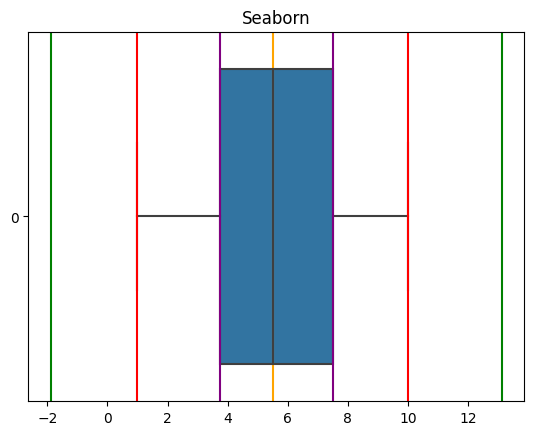

In [95]:
numerical_even = sorted(numerical_even)
Q1 = np.percentile(numerical_even, 25)
Median = np.median(numerical_even)
Q3 = np.percentile(numerical_even, 75)
IQR = np.abs(Q3 - Q1)
superior = Q3 + 1.5*IQR
inferior = Q1 - 1.5*IQR

print("SCIPY/IQR:", scipy.stats.iqr(numerical_even, interpolation='midpoint'))

print("Inferior:",inferior, " Q1:", Q1, " Median:", Median, " Q3:", Q3, " Superior:", superior, "    IQR: ", IQR)

sns.boxplot(numerical_even, orient='h');
plt.axvline(min(numerical_even), color='red')
plt.axvline(inferior, color='green')
plt.axvline(Q1, color='purple')
plt.axvline(Median, color='orange')
plt.axvline(Q3, color='purple')
plt.axvline(superior, color='green')
plt.axvline(max(numerical_even), color='red')
plt.title('Seaborn')
plt.show()